# Finding normal pitch angle threshold

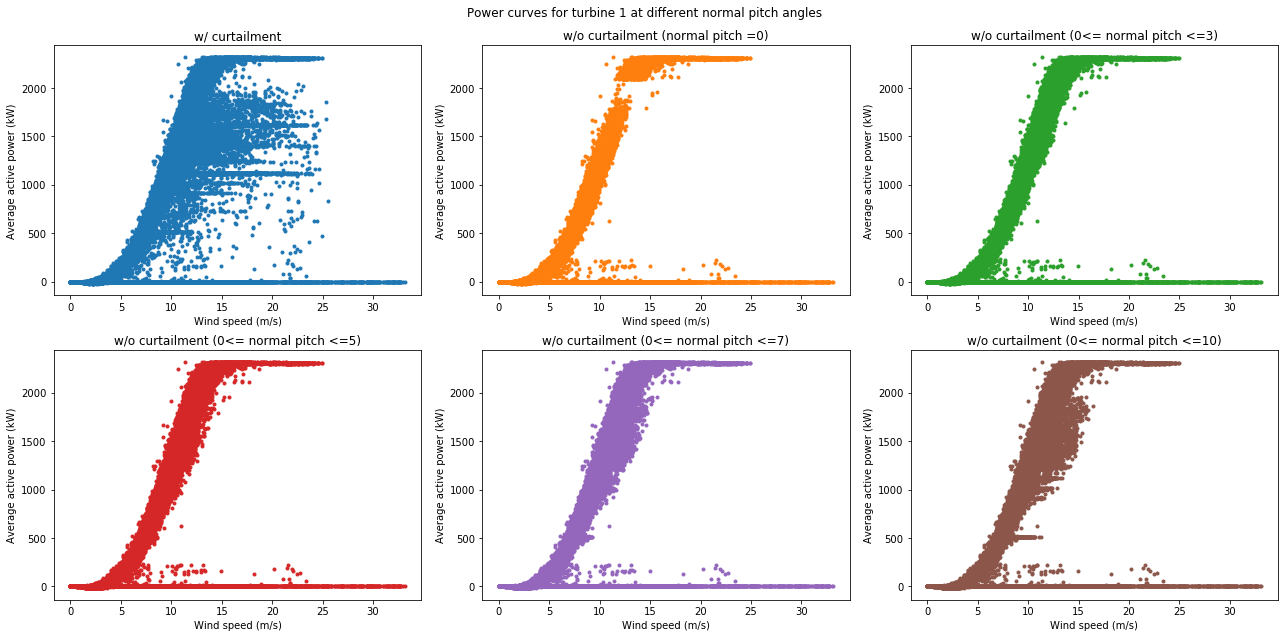

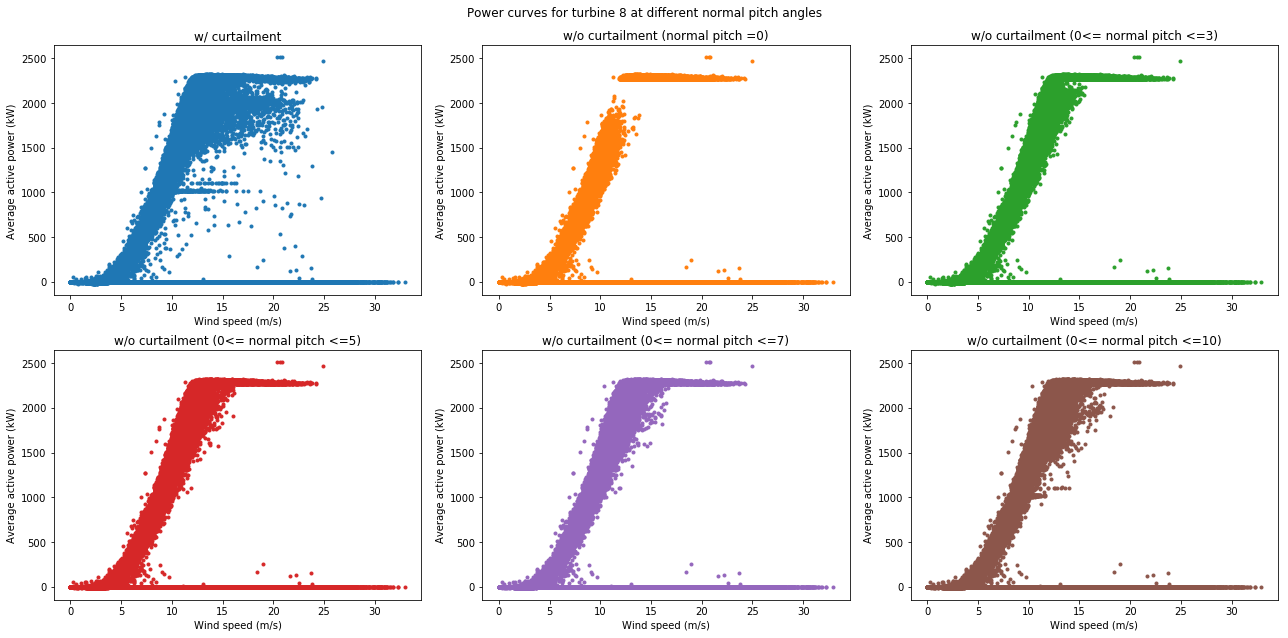

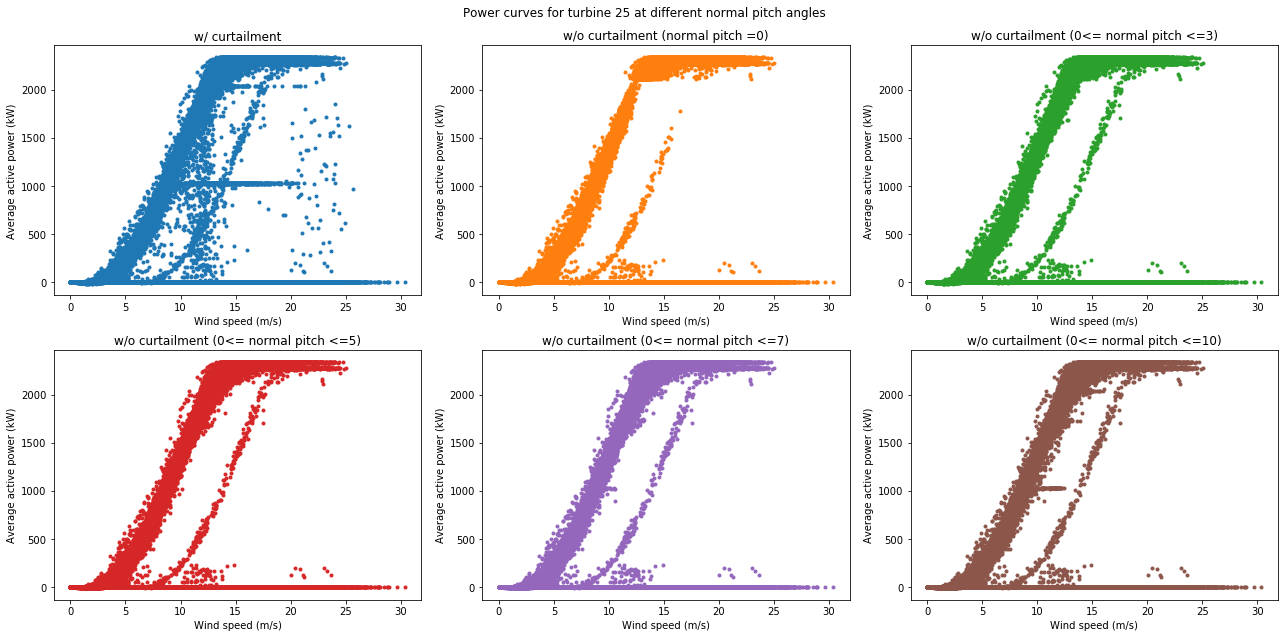

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

list1=[1,8,25] #list of turbines to plot #plot these three turbines to visualise the difference

for x in list1:
    #filter only data for turbine x
    dfx=df[(df['turbine']==x)].copy()
    
    #filter out curtailment - curtailed when turbine is pitching above (and/or below) a certain threshold
    def f0(c): #0 deg normal pitch
        if c['pitch']==0 or (c['pitch']!=0 and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment0']=dfx.apply(f0,axis=1)

    def f1(c): #3 deg
        if 0<=c['pitch']<=3 or ((c['pitch']>3 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                    c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment1']=dfx.apply(f1,axis=1)
    
    def f2(c): #5 deg
        if 0<=c['pitch']<=5 or ((c['pitch']>5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                    c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment2']=dfx.apply(f2,axis=1)
    
    def f3(c): #7 deg
        if 0<=c['pitch']<=7 or ((c['pitch']>7 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                    c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment3']=dfx.apply(f3,axis=1)
    
    def f4(c): #10 deg
        if 0<=c['pitch']<=10 or ((c['pitch']>10 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                      c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment4']=dfx.apply(f4,axis=1)
    
    #filter data for plots
    df1=dfx[dfx.curtailment0=='normal'] #normal w/o curtailment 0 deg
    df2=dfx[dfx.curtailment1=='normal'] #normal w/o curtailment 3 deg
    df3=dfx[dfx.curtailment2=='normal'] #normal w/o curtailment 5 deg
    df4=dfx[dfx.curtailment3=='normal'] #normal w/o curtailment 7 deg
    df5=dfx[dfx.curtailment4=='normal'] #normal w/o curtailment 10 deg
    
    #get x and y coordinates
    x1=dfx['ws_av'] #normal w/ curtailment
    y1=dfx['ap_av'] 
    x2=df1['ws_av'] #normal w/o curtailment 0 deg pitch
    y2=df1['ap_av'] 
    x3=df2['ws_av'] #normal w/o curtailment 3 deg
    y3=df2['ap_av']
    x4=df3['ws_av'] #normal w/o curtailment 5 deg
    y4=df3['ap_av']
    x5=df4['ws_av'] #normal w/o curtailment 7 deg
    y5=df4['ap_av']
    x6=df5['ws_av'] #normal w/o curtailment 10 deg
    y6=df5['ap_av']

    #plot the figure
    fig=plt.figure(figsize=(18,9),dpi=1500)
    
    ax1=fig.add_subplot(231)
    ax1.scatter(x1,y1,marker=".",c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/ curtailment')
    
    ax2=fig.add_subplot(232)
    ax2.scatter(x2,y2,marker=".",c='C1')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (normal pitch =0)')

    ax3=fig.add_subplot(233)
    ax3.scatter(x3,y3,marker=".",c='C2')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=3)')
    
    ax4=fig.add_subplot(234)
    ax4.scatter(x4,y4,marker=".",c='C3')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=5)')
    
    ax5=fig.add_subplot(235)
    ax5.scatter(x5,y5,marker=".",c='C4')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=7)')
    
    ax6=fig.add_subplot(236)
    ax6.scatter(x6,y6,marker=".",c='C5')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=10)')

    fig.suptitle('Power curves for turbine %s'%x+' at different normal pitch angles')
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

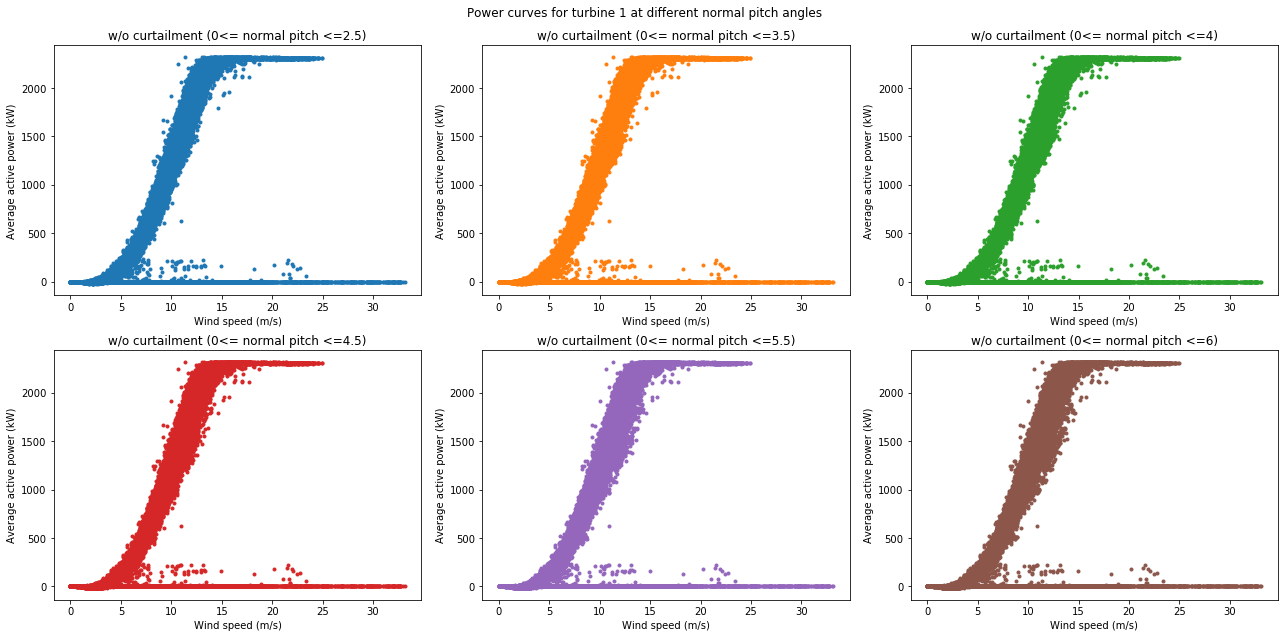

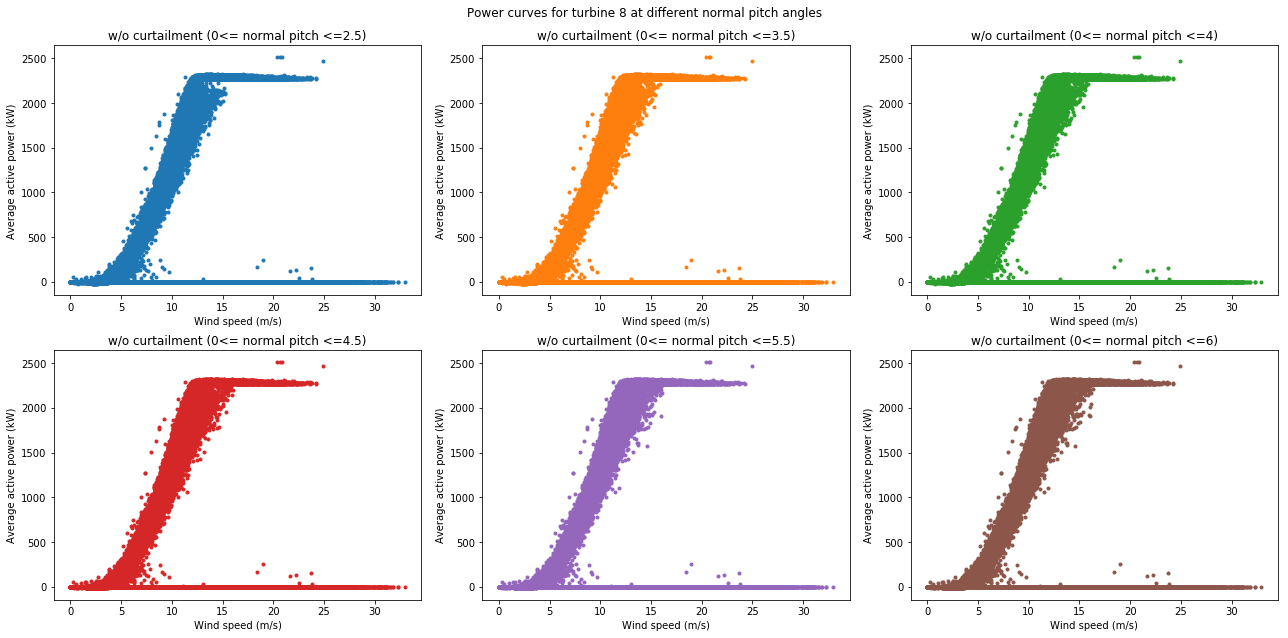

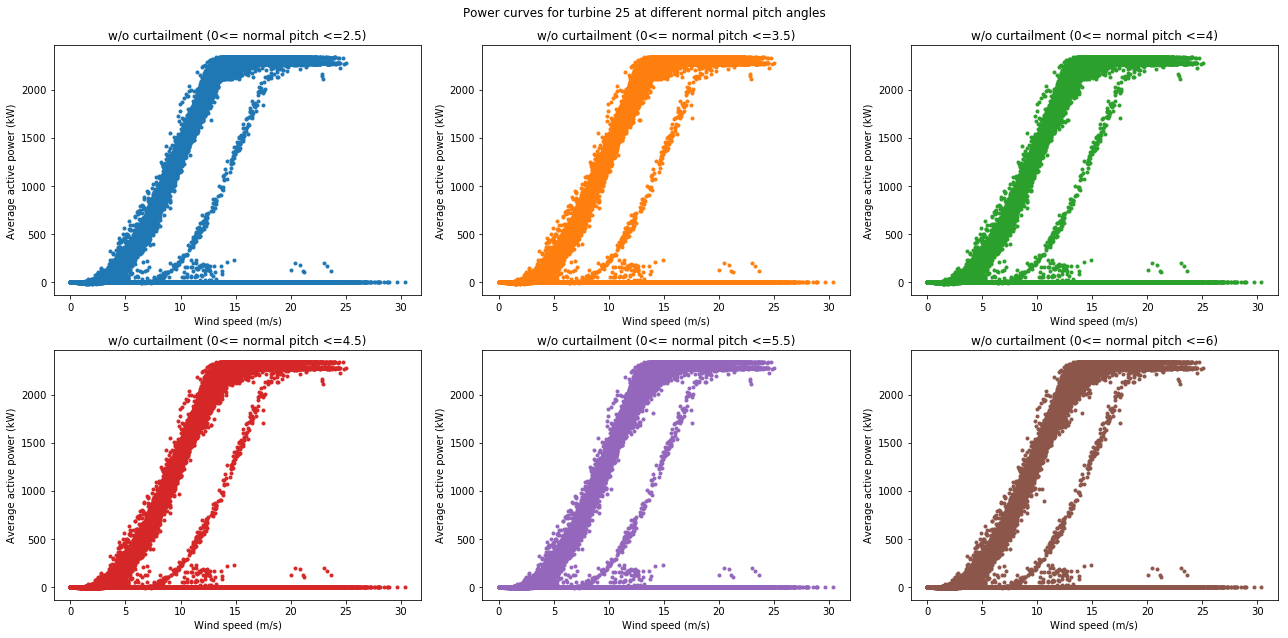

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

list1=[1,8,25] #list of turbines to plot #plot these three turbines to visualise the difference

#narrow down - plot for pitch angles between 3 and 6 deg
for x in list1:
    dfx=df[(df['turbine']==x)].copy()
    
    def f0(c): #2.5 deg
        if 0<=c['pitch']<=2.5 or ((c['pitch']>2.5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                        c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment0']=dfx.apply(f0,axis=1)

    def f1(c): #3.5 deg
        if 0<=c['pitch']<=3.5 or ((c['pitch']>3.5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                        c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment1']=dfx.apply(f1,axis=1)
    
    def f2(c): #4 deg
        if 0<=c['pitch']<=4 or ((c['pitch']>4 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                    c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment2']=dfx.apply(f2,axis=1)
    
    def f3(c): #4.5 deg
        if 0<=c['pitch']<=4.5 or ((c['pitch']>4.5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                        c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment3']=dfx.apply(f3,axis=1)
    
    def f4(c): #5.5 deg
        if 0<=c['pitch']<=5.5 or ((c['pitch']>5.5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                        c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment4']=dfx.apply(f4,axis=1)
    
    def f5(c): #6 deg
        if 0<=c['pitch']<=6 or ((c['pitch']>6 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                    c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return 'normal' 
        else:
            return 'curtailed'
    dfx['curtailment5']=dfx.apply(f5,axis=1)
    
    df1=dfx[dfx.curtailment0=='normal'] #normal w/o curtailment 2.5 deg
    df2=dfx[dfx.curtailment1=='normal'] #normal w/o curtailment 3.5 deg
    df3=dfx[dfx.curtailment2=='normal'] #normal w/o curtailment 4 deg
    df4=dfx[dfx.curtailment3=='normal'] #normal w/o curtailment 4.5 deg
    df5=dfx[dfx.curtailment4=='normal'] #normal w/o curtailment 5.5 deg
    df6=dfx[dfx.curtailment5=='normal'] #normal w/o curtailment 6 deg
    
    x1=df1['ws_av'] #normal w/o curtailment 2.5 deg pitch
    y1=df1['ap_av'] 
    x2=df2['ws_av'] #normal w/o curtailment 3.5 deg
    y2=df2['ap_av']
    x3=df3['ws_av'] #normal w/o curtailment 4 deg
    y3=df3['ap_av']
    x4=df4['ws_av'] #normal w/o curtailment 4.5 deg
    y4=df4['ap_av']
    x5=df5['ws_av'] #normal w/o curtailment 5.5 deg
    y5=df5['ap_av']
    x6=df6['ws_av'] #normal w/o curtailment 6 deg
    y6=df6['ap_av']

    fig=plt.figure(figsize=(18,9),dpi=1500)
    
    ax1=fig.add_subplot(231)
    ax1.scatter(x1,y1,marker=".",c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=2.5)')
    
    ax2=fig.add_subplot(232)
    ax2.scatter(x2,y2,marker=".",c='C1')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=3.5)')
    
    ax3=fig.add_subplot(233)
    ax3.scatter(x3,y3,marker=".",c='C2')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=4)')
    
    ax4=fig.add_subplot(234)
    ax4.scatter(x4,y4,marker=".",c='C3')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=4.5)')
    
    ax5=fig.add_subplot(235)
    ax5.scatter(x5,y5,marker=".",c='C4')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=5.5)')
    
    ax6=fig.add_subplot(236)
    ax6.scatter(x6,y6,marker=".",c='C5')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.title('w/o curtailment (0<= normal pitch <=6)')

    fig.suptitle('Power curves for turbine %s'%x+' at different normal pitch angles')
    plt.tight_layout()
    plt.subplots_adjust(top=.92)
    plt.show()

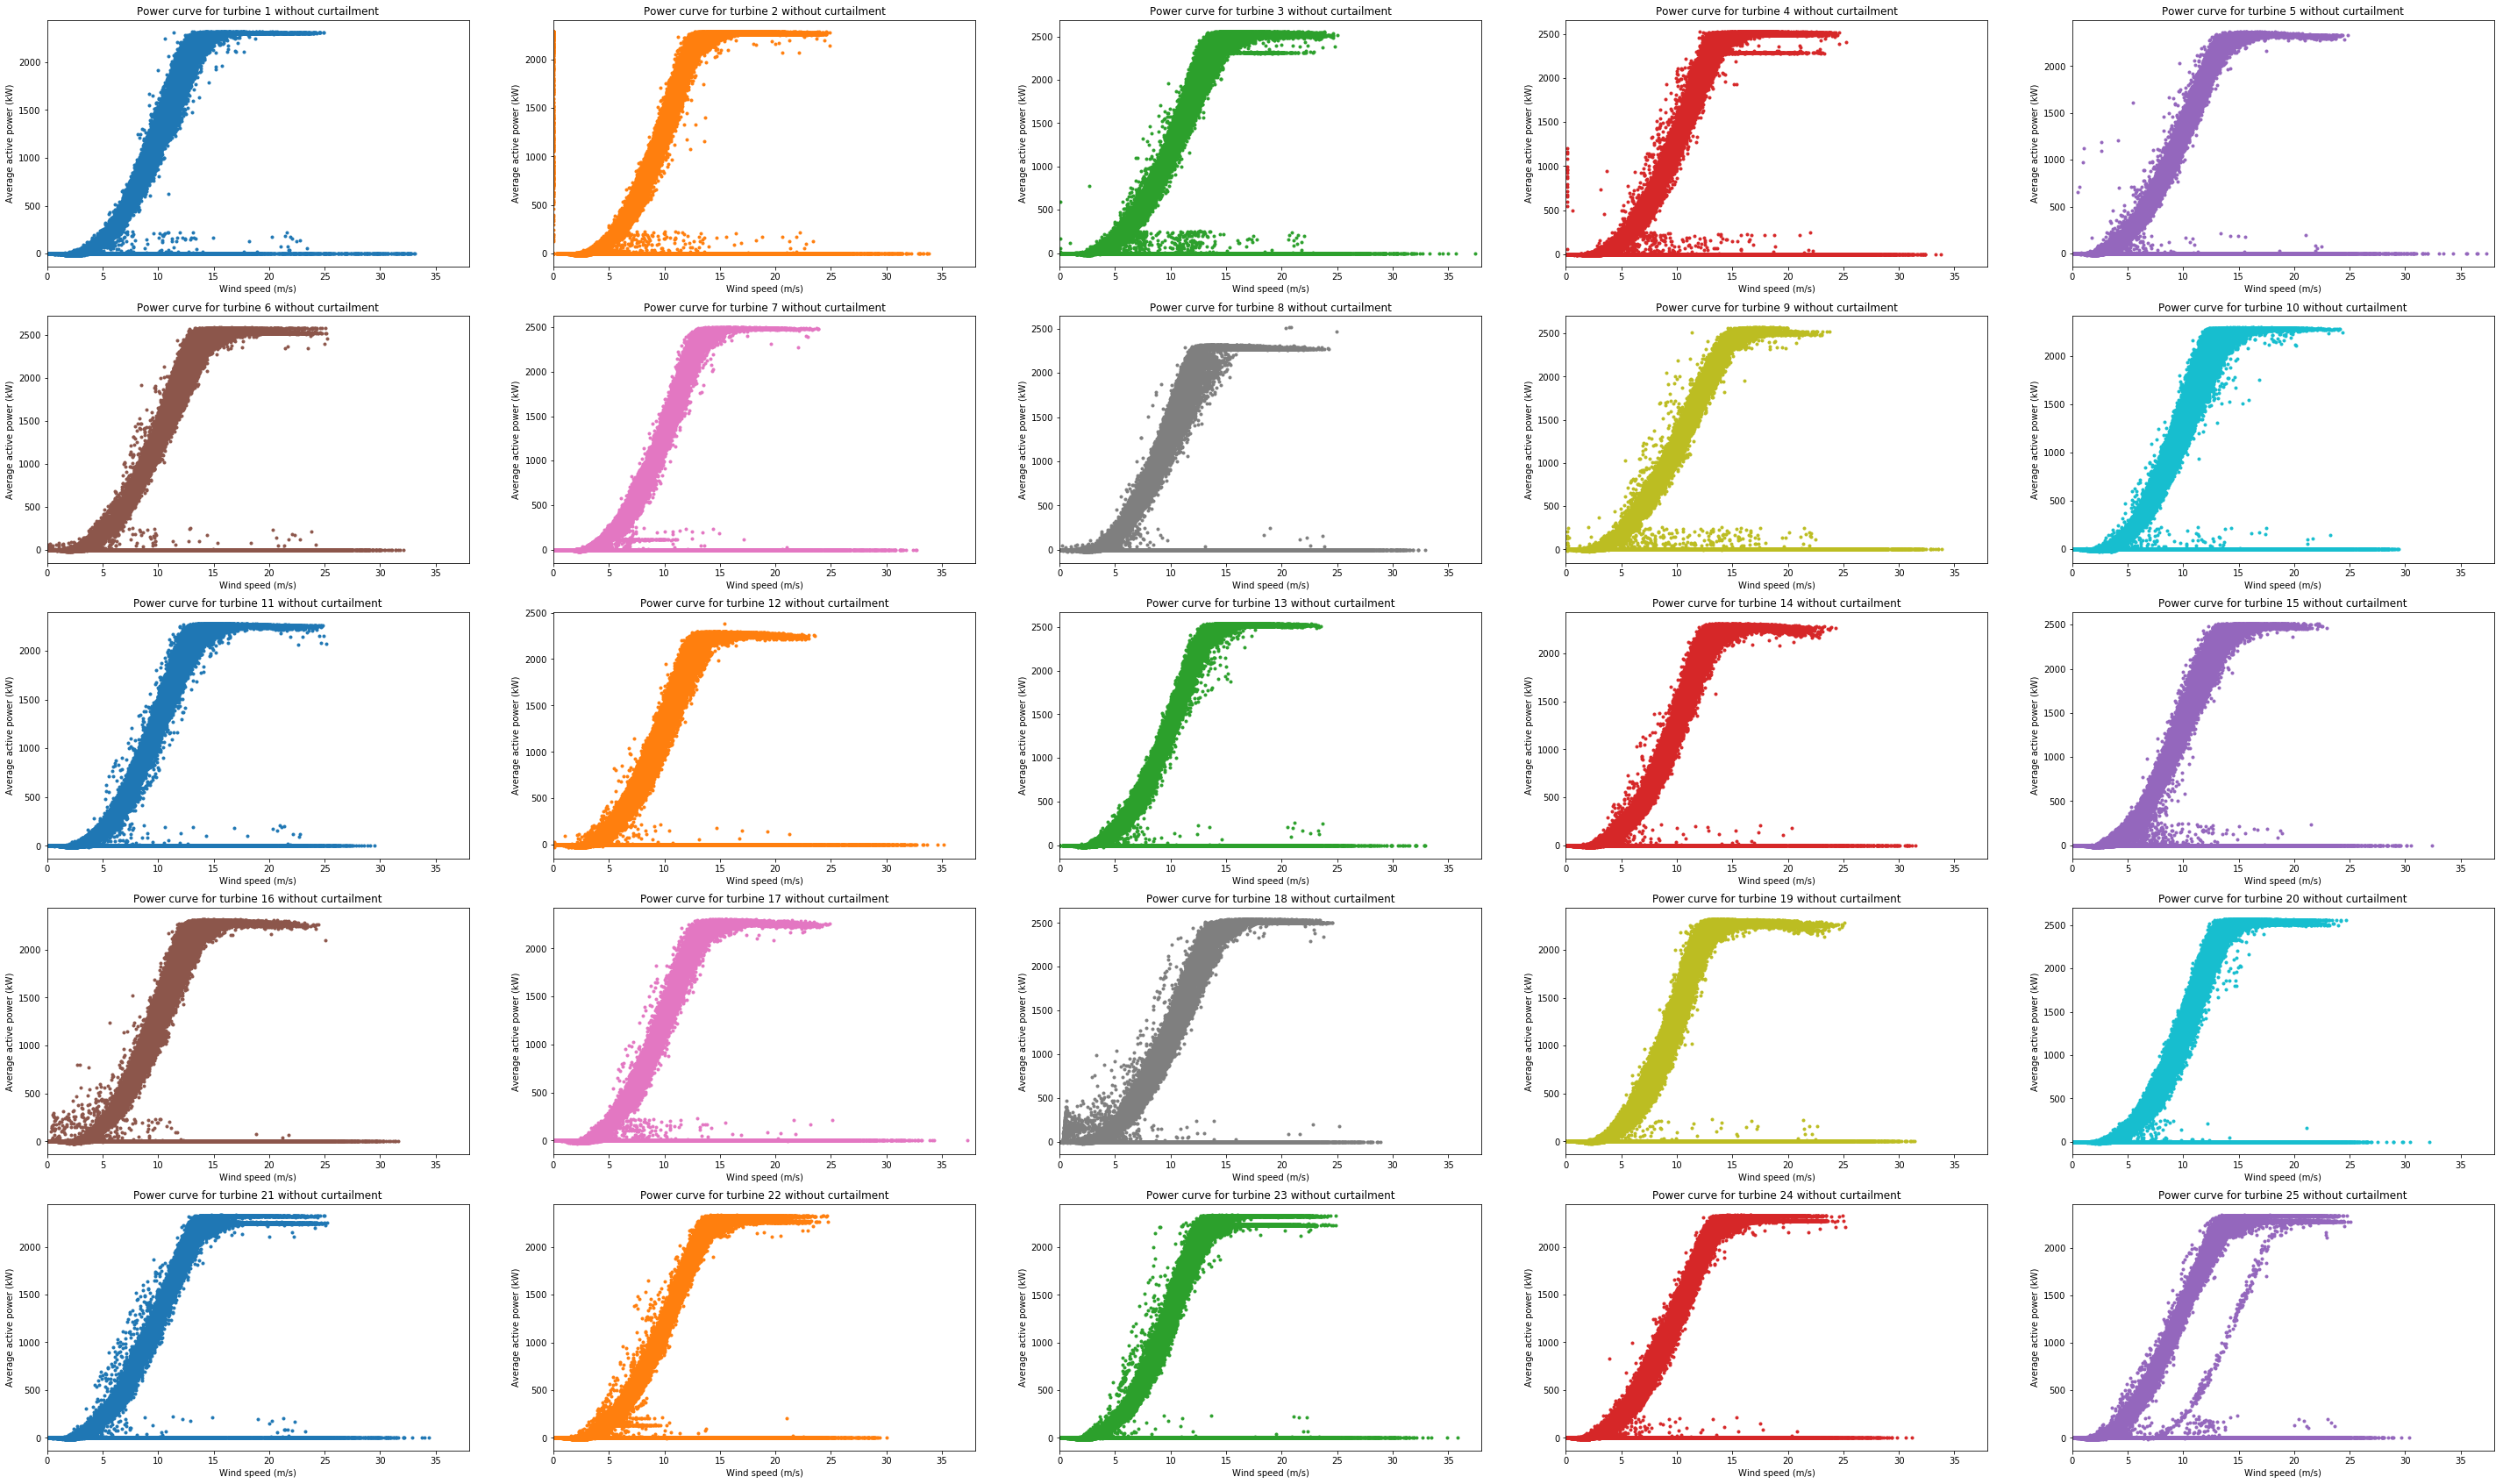

In [1]:
#import libraries
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

#plot for all turbines with threshold of 3.5deg
list2=list(df['turbine'].unique()) #list of turbines to plot
list2=sorted(list2,key=int) #sort turbines in ascending order

#create new empty dataframe with the same index
df2=pd.DataFrame(index=df.index)

#apply function for filtering curtailment 
for x in list2:
    dfx=df[(df['turbine']==x)].copy()

    def f(c): #3.5 deg
        if 0<=c['pitch']<=3.5 or ((c['pitch']>3.5 or c['pitch']<0) and (c['ap_av']<=(.1*dfx['ap_av'].max()) or 
                                                                        c['ap_av']>=(.9*dfx['ap_av'].max()))):
            return c['ap_av'] 
    df2['%s'%x]=dfx.apply(f,axis=1)
    
#copy wind speed from original dataframe    
df2['Wind speed (m/s)']=df['ws_av']

#setting wind speed as index
df2=df2.set_index('Wind speed (m/s)')

#create new list for individual subplot titles
list3=['Power curve for turbine %s without curtailment' %x for x in list2]

#plotting all columns (all turbines) in the same figure
ax=df2.plot(subplots=True,style='.',layout=(5,5),figsize=(50,30),sharex=False,title=list3,legend=False,xlim=(0,38))
list4=list(range(0,5)) #based on layout=(x,y), create lists with range(0,x) and (0,y)
list5=list(itertools.product(list4,list4)) #get coordinates of each subplot
for (x,y) in list5:
    ax[x][y].set_ylabel('Average active power (kW)')

In [6]:
#round pitch angle to nearest degree
df['pitch_round']=df['pitch'].round()
dfg=pd.DataFrame(df.groupby('pitch_round').size())
dfg=dfg.sort_values([0],ascending=False)
#get percentage of frequency of pitch angle
dfg['pct']=dfg[0]/dfg[0].sum()*100
dfg

0        pct
pitch_round                    
 0.0         1860480  58.711186
 70.0         276033   8.710776
 87.0         168835   5.327928
 1.0          113249   3.573800
 90.0          80266   2.532955
 2.0           54123   1.707960
 91.0          53477   1.687574
 92.0          36593   1.154766
 3.0           34269   1.081427
 4.0           27782   0.876717
 5.0           24818   0.783182
 6.0           23143   0.730324
 8.0           22213   0.700976
 7.0           22092   0.697157
 9.0           20394   0.643574
 10.0          18880   0.595796
 11.0          17655   0.557139
 12.0          16467   0.519649
 13.0          15673   0.494593
 14.0          14167   0.447068
 15.0          12921   0.407748
 16.0          11359   0.358456
 17.0           9592   0.302695
 18.0           8804   0.277828
 89.0           7998   0.252393
 19.0           6905   0.217901
 61.0           6867   0.216702
 60.0           6834   0.215661
 22.0           6385   0.201492
 20.0           6065   0.191393
...              ...        ...
 281.0             1   0.000032
-160.0             1   0.000032
 288.0             1   0.000032
-175.0             1   0.000032
-185.0             1   0.000032
-202.0             1   0.000032
 307.0             1   0.000032
 239.0             1   0.000032
 229.0             1   0.000032
-101.0             1   0.000032
-65.0              1   0.000032
-6.0               1   0.000032
-9.0               1   0.000032
-10.0              1   0.000032
-22.0              1   0.000032
-24.0              1   0.000032
-29.0              1   0.000032
-57.0              1   0.000032
-60.0              1   0.000032
-68.0              1   0.000032
 233.0             1   0.000032
-73.0              1   0.000032
 221.0             1   0.000032
-89.0              1   0.000032
-93.0              1   0.000032
 228.0             1   0.000032
-96.0              1   0.000032
-99.0              1   0.000032
 232.0             1   0.000032
 327.0             1   0.000032

[351 rows x 2 columns]

# Finding power threshold before cut-in

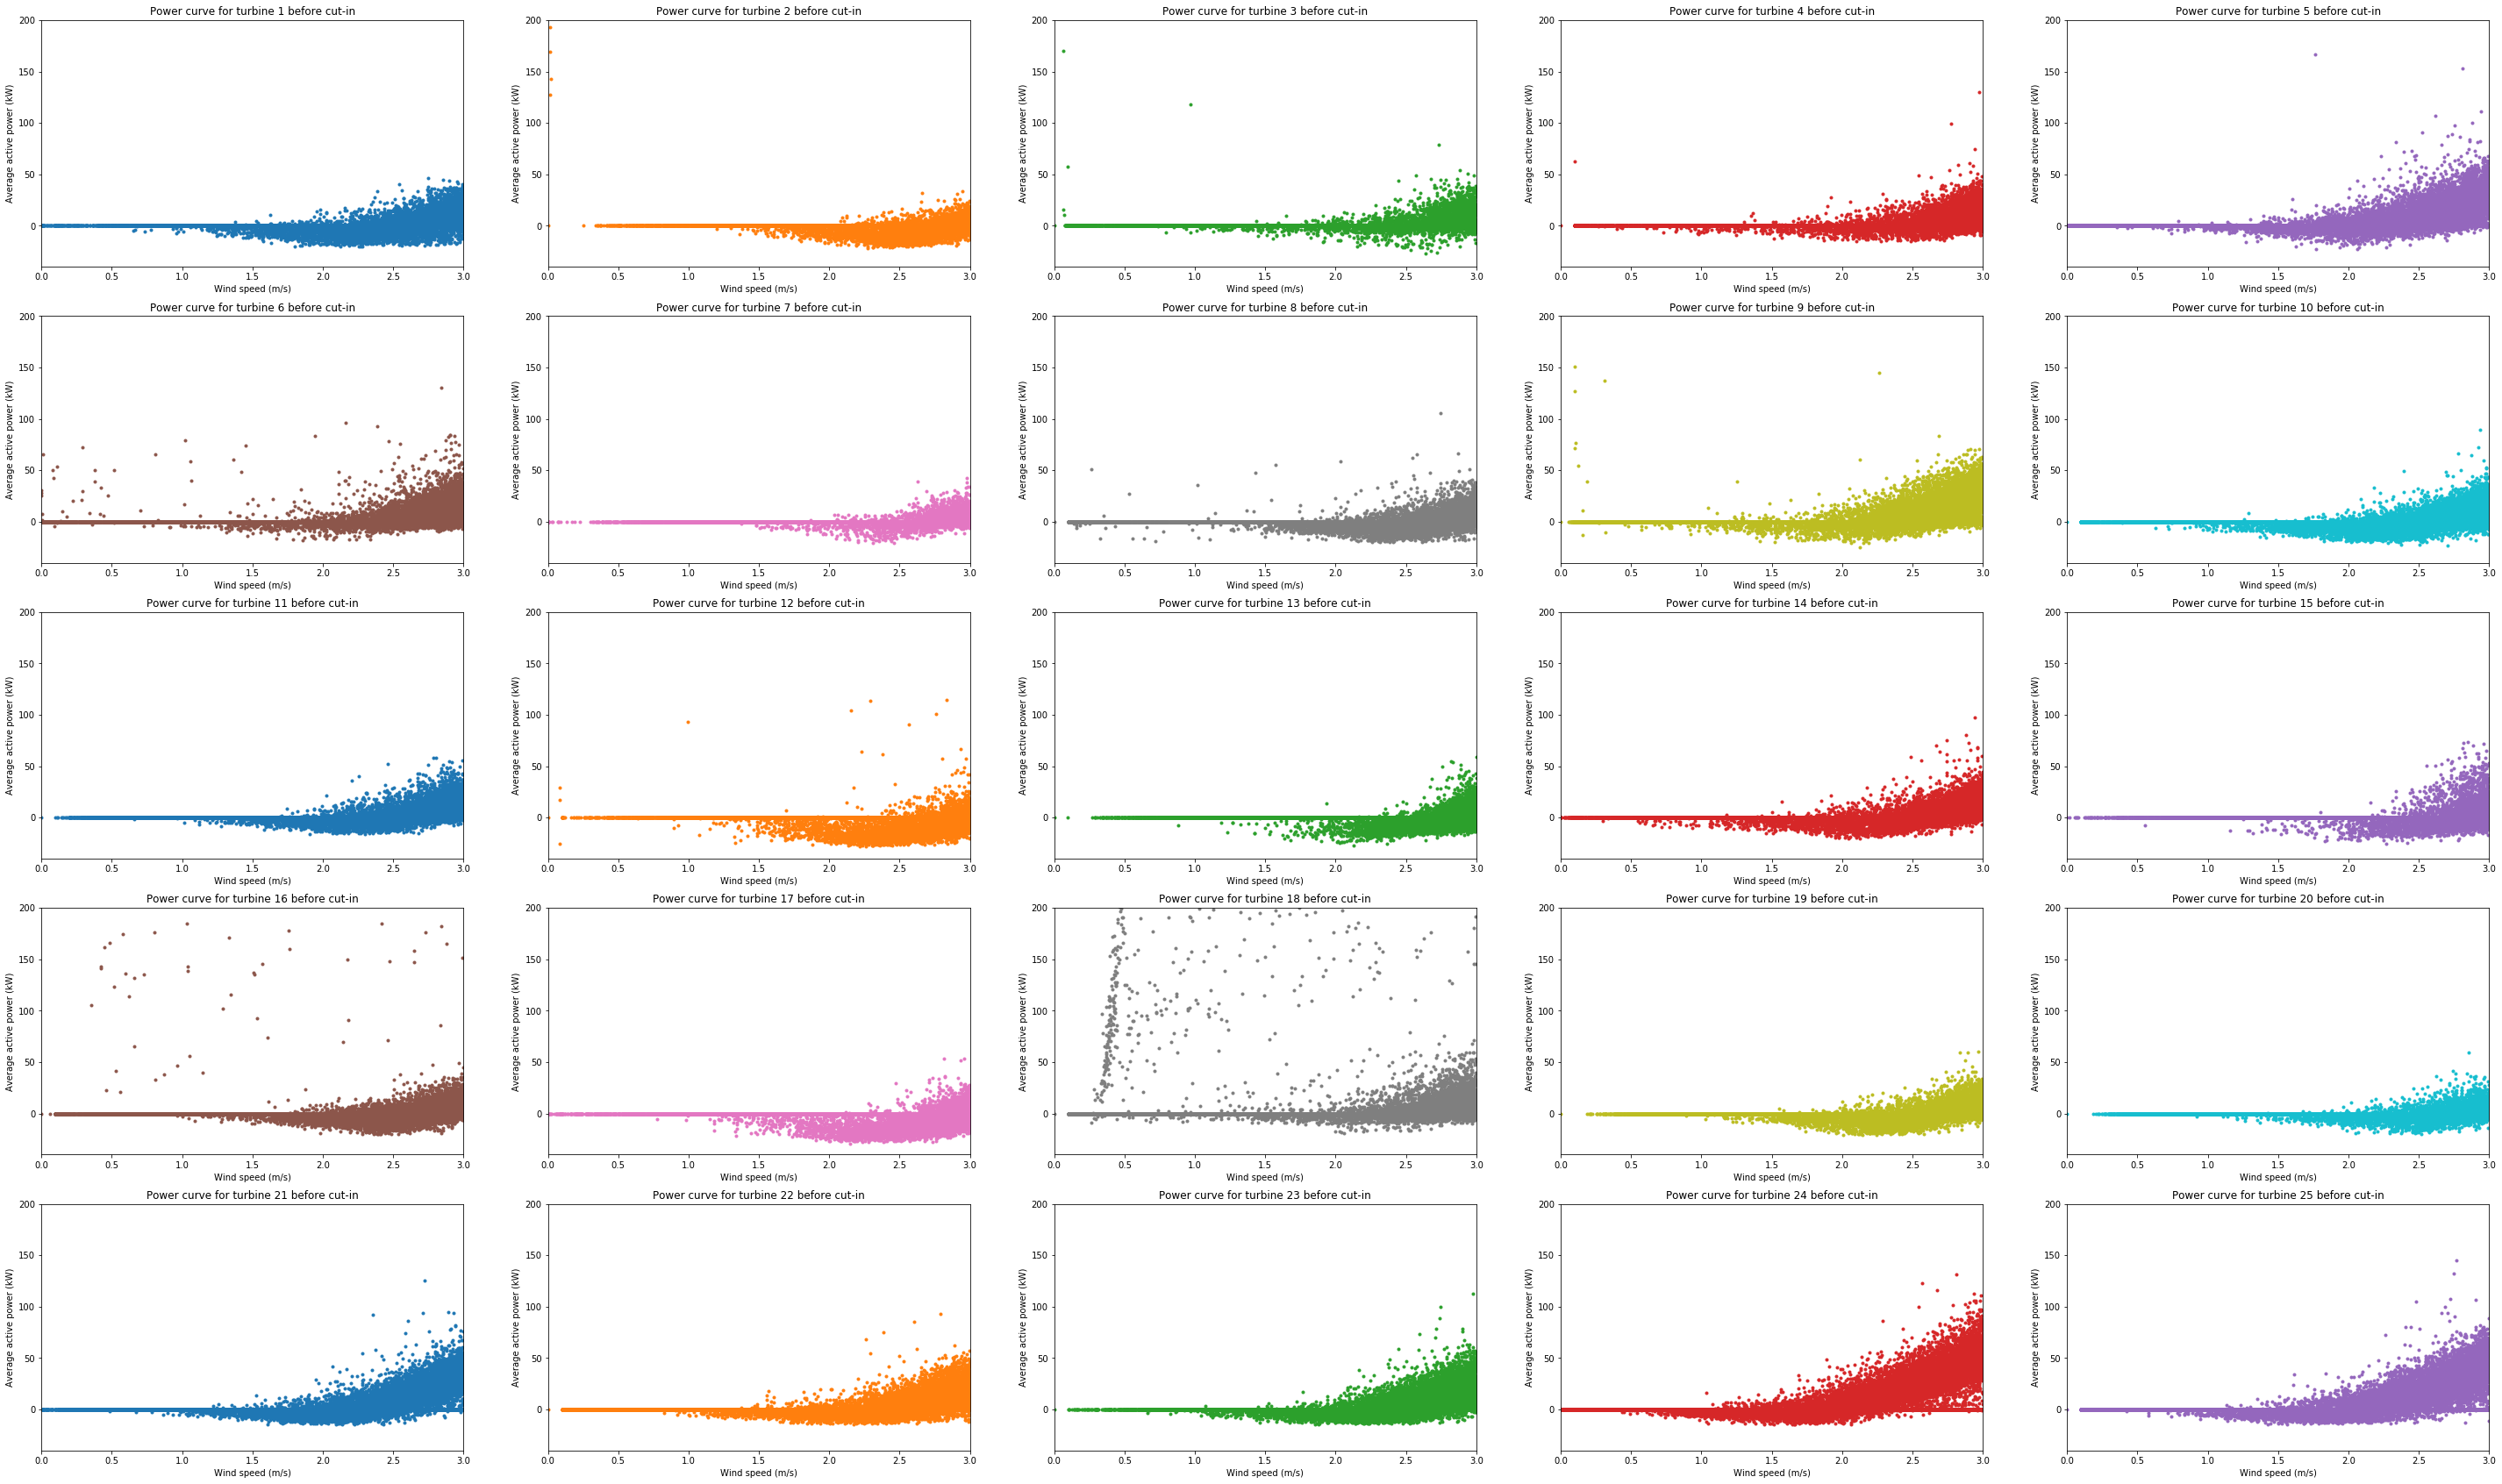

In [27]:
#extract power readings before cut-in (3m/s)
def f(c): 
    if c['ws_av']<=3:
        return c['ap_av'] 
df['power']=df.apply(f,axis=1)

#create pivot table (new dataframe)
p=pd.pivot_table(df,index=['ws_av'],columns=['turbine'],values=['power'])

#removing pivot table values name from heading
p.columns=p.columns.droplevel(0)

list6=['Power curve for turbine %s before cut-in' %x for x in list2]

#rename index name
p.index.name='Wind speed (m/s)'

ax=p.plot(subplots=True,figsize=(50,30),layout=(5,5),style='.',sharex=False,title=list6,legend=False,xlim=(0,3),
          ylim=(-40,200))
for (x,y) in list5:
    ax[x][y].set_ylabel('Average active power (kW)')

In [8]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

list1=[24] #list of turbines to plot #plot these three turbines to visualise the difference

for x in list1:
    #filter only data for turbine x
    dfx=df[(df['turbine']==x)].copy()
    
    #get x and y coordinates
    x1=dfx['ws_av'] #normal w/ curtailment
    y1=dfx['ap_av'] 

    #plot the figure
    fig=plt.figure(figsize=(7,4.5),dpi=500)
    
    ax1=fig.add_subplot(111)
    ax1.scatter(x1,y1,marker=".",c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.show()

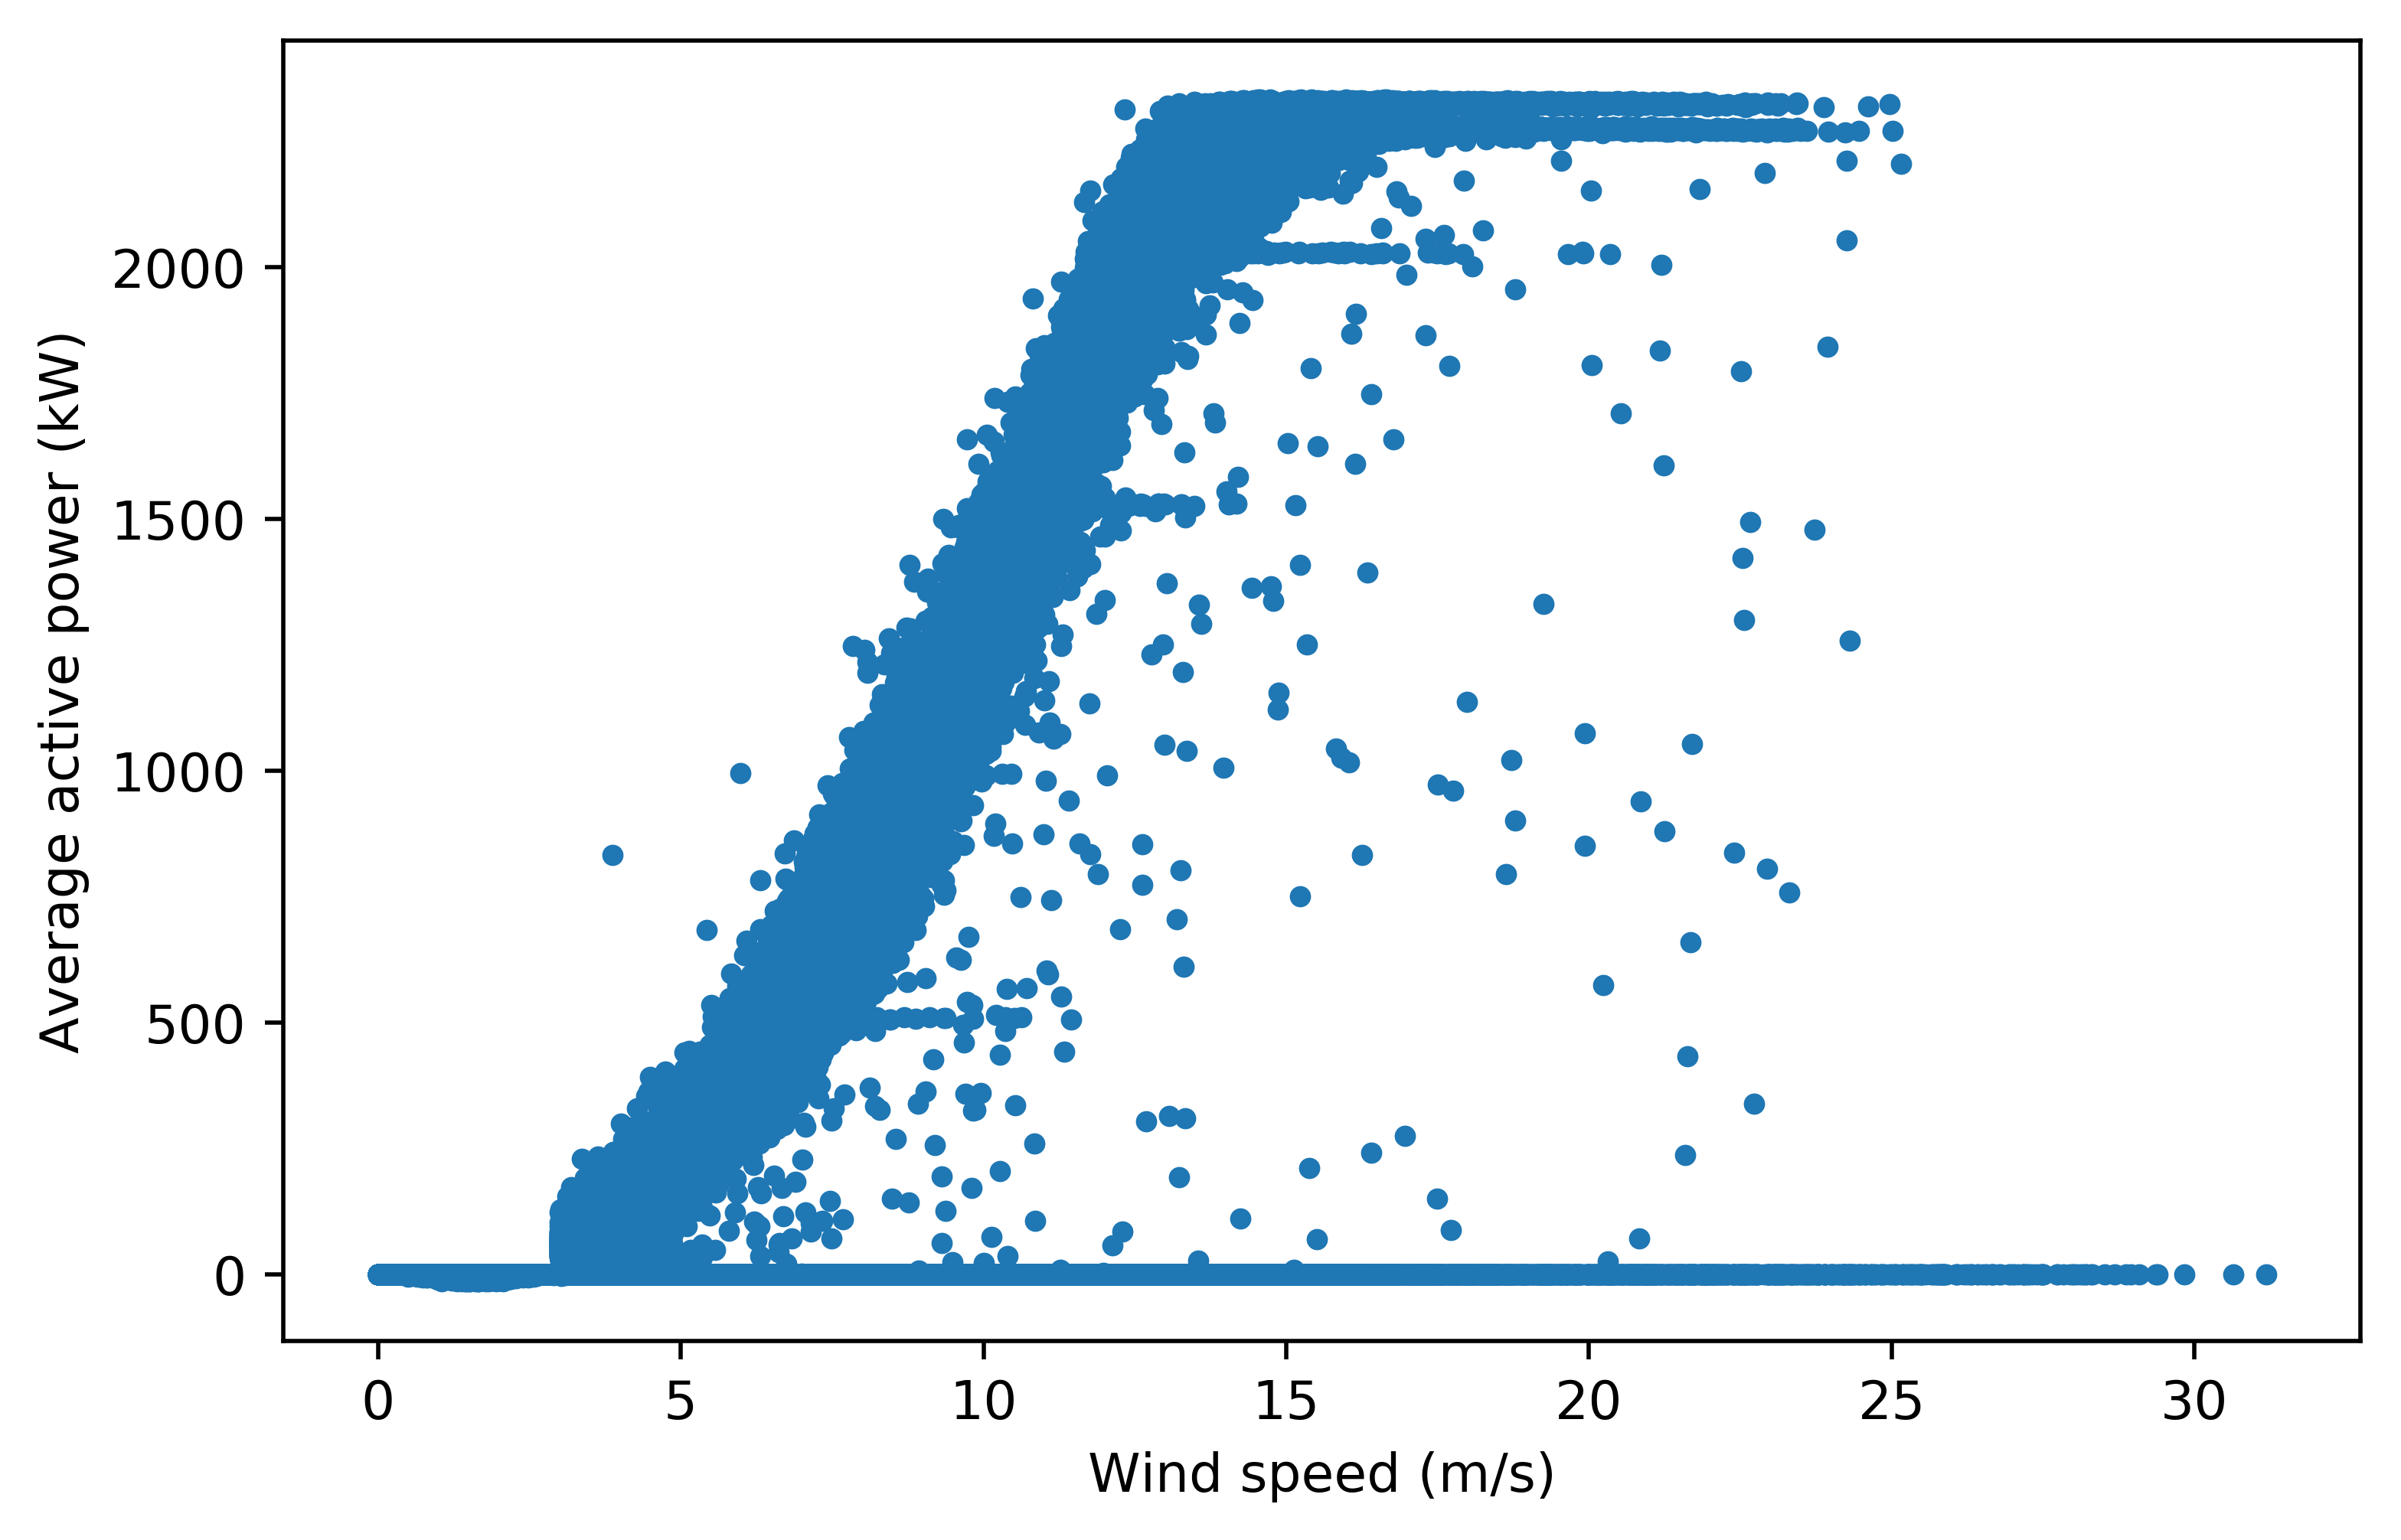

In [7]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

list1=[24] #list of turbines to plot #plot these three turbines to visualise the difference

for x in list1:
    #filter only data for turbine x
    dfx=df[(df['turbine']==x)].copy()
    def f(c):
        if c['ws_av']<3 and c['ap_av']>0:
            return 0
        else:
            return c['ap_av']
    dfx['ap']=dfx.apply(f,axis=1)
    
    #get x and y coordinates
    x1=dfx['ws_av'] #normal w/ curtailment
    y1=dfx['ap'] 

    #plot the figure
    fig=plt.figure(figsize=(7,4.5),dpi=500)
    
    ax1=fig.add_subplot(111)
    ax1.scatter(x1,y1,marker=".",c='C0')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Average active power (kW)')
    plt.show()